## best streaming service analysis


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.offline as pyo
pyo.init_notebook_mode()
%matplotlib inline

In [ ]:
df= pd.read_csv('moviestreams.csv')

# viewing first 5 datasets

In [3]:
df.head()

Unnamed: 0  ID                           Title  Year  Age  IMDb  \
0           0   1                       Inception  2010  13+   8.8   
1           1   2                      The Matrix  1999  18+   8.7   
2           2   3          Avengers: Infinity War  2018  13+   8.5   
3           3   4              Back to the Future  1985   7+   8.5   
4           4   5  The Good, the Bad and the Ugly  1966  18+   8.8   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
0             87%        1     0            0        0     0   
1             87%        1     0            0        0     0   
2             84%        1     0            0        0     0   
3             96%        1     0            0        0     0   
4             97%        1     0            1        0     0   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2         Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                 Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                    Sergio Leone                           Western   

                        Country                 Language  Runtime  
0  United States,United Kingdom  English,Japanese,French    148.0  
1                 United States                  English    136.0  
2                 United States                  English    149.0  
3                 United States                  English    116.0  
4      Italy,Spain,West Germany                  Italian    161.0

## to check the number of data points


In [7]:
df.shape

(16744, 17)

 # seeing the available columns in datasets


In [3]:
cols=df.columns.tolist()

In [30]:
cols

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

## to drop unwanted columns

In [4]:
df.drop(['Unnamed: 0','ID',], axis=1, inplace = True)

In [33]:
df

Title  Year  Age  IMDb Rotten Tomatoes  \
0                           Inception  2010  13+   8.8             87%   
1                          The Matrix  1999  18+   8.7             87%   
2              Avengers: Infinity War  2018  13+   8.5             84%   
3                  Back to the Future  1985   7+   8.5             96%   
4      The Good, the Bad and the Ugly  1966  18+   8.8             97%   
...                               ...   ...  ...   ...             ...   
16739       The Ghosts of Buxley Hall  1980  NaN   6.2             NaN   
16740                  The Poof Point  2001   7+   4.7             NaN   
16741           Sharks of Lost Island  2013  NaN   5.7             NaN   
16742              Man Among Cheetahs  2017  NaN   6.6             NaN   
16743                In Beaver Valley  1950  NaN   NaN             NaN   

       Netflix  Hulu  Prime Video  Disney+  Type  \
0            1     0            0        0     0   
1            1     0            0        0     0   
2            1     0            0        0     0   
3            1     0            0        0     0   
4            1     0            1        0     0   
...        ...   ...          ...      ...   ...   
16739        0     0            0        1     0   
16740        0     0            0        1     0   
16741        0     0            0        1     0   
16742        0     0            0        1     0   
16743        0     0            0        1     0   

                            Directors                            Genres  \
0                   Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1      Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2             Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                     Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                        Sergio Leone                           Western   
...                               ...                               ...   
16739                    Bruce Bilson      Comedy,Family,Fantasy,Horror   
16740                     Neal Israel              Comedy,Family,Sci-Fi   
16741                    Neil Gelinas                       Documentary   
16742            Richard Slater-Jones                       Documentary   
16743                     James Algar          Documentary,Short,Family   

                            Country                 Language  Runtime  
0      United States,United Kingdom  English,Japanese,French    148.0  
1                     United States                  English    136.0  
2                     United States                  English    149.0  
3                     United States                  English    116.0  
4          Italy,Spain,West Germany                  Italian    161.0  
...                             ...                      ...      ...  
16739                 United States                  English    120.0  
16740                 United States                  English     90.0  
16741                 United States                  English      NaN  
16742                 United States                  English      NaN  
16743                 United States                  English     32.0  

[16744 rows x 15 columns]

## to see if there are missing values

In [37]:
df.isnull().sum()

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

## to remove + sign in age

In [48]:
df['Age']

0        13+
1        18+
2        13+
3         7+
4        18+
        ... 
16739    NaN
16740     7+
16741    NaN
16742    NaN
16743    NaN
Name: Age, Length: 16744, dtype: object

In [54]:
age_noplus={'13+':13,'17+':17,'18+':18,'16+':16}
df['Agenew']=df['Age'].map(age_noplus)
df['Agenew']

0        13.0
1        18.0
2        13.0
3         NaN
4        18.0
         ... 
16739     NaN
16740     NaN
16741     NaN
16742     NaN
16743     NaN
Name: Agenew, Length: 16744, dtype: float64

## remove percent in rotten tomatoes

In [60]:
df['Rotten Tomatoes']


0        87%
1        87%
2        84%
3        96%
4        97%
        ... 
16739    NaN
16740    NaN
16741    NaN
16742    NaN
16743    NaN
Name: Rotten Tomatoes, Length: 16744, dtype: object

In [67]:
df['New_Rotten_Tomatoes'] = df['Rotten Tomatoes'].str.replace("%","")
df['New_Rotten_Tomatoes'] =df['New_Rotten_Tomatoes'].astype(float)

In [68]:
df['New_Rotten_Tomatoes'] 

0        87.0
1        87.0
2        84.0
3        96.0
4        97.0
         ... 
16739     NaN
16740     NaN
16741     NaN
16742     NaN
16743     NaN
Name: New_Rotten_Tomatoes, Length: 16744, dtype: float64

## finding the number of movies for each age group

In [78]:
df['Age'].value_counts()


18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

## to find the top 10 languages

In [ ]:
languages=df['Language'].value_counts().head(10)
languages

English            10955
Hindi                503
English,Spanish      276
Spanish              267
English,French       174
Italian              166
French               163
Japanese             155
Mandarin             151
Tamil                 93
Name: Language, dtype: int64

<AxesSubplot:title={'center':'Top 10 languages people prefer in Streaming Services'}>

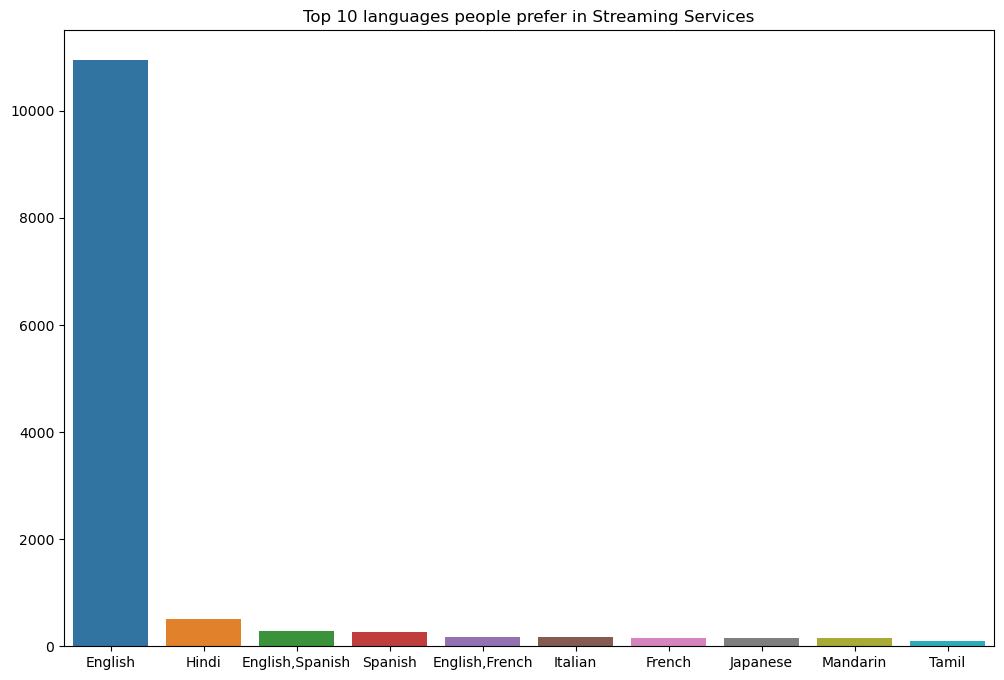

In [19]:
plt.figure(figsize=(12,8))
plt.title('Top 10 languages people prefer in Streaming Services')
sns.barplot(x=languages.index, y=languages.values)

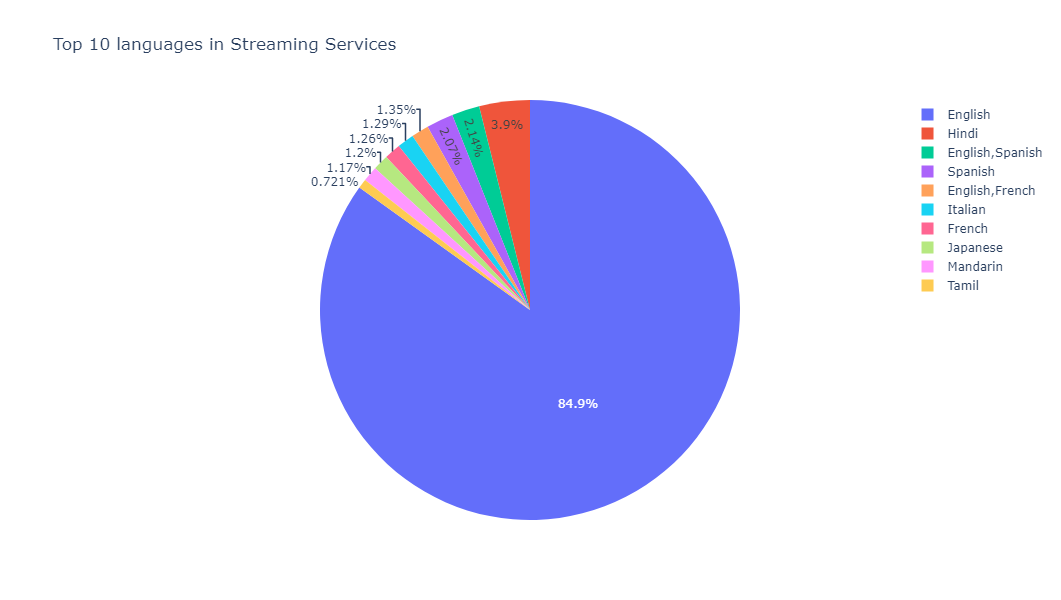

In [103]:

fig = px.pie( df,
             values=languages.values, 
             names=languages.index, 
             title='Top 10 languages in Streaming Services',
             height=600)
fig

## number of movies in various age grp

In [106]:
AGE=df['Age'].value_counts()

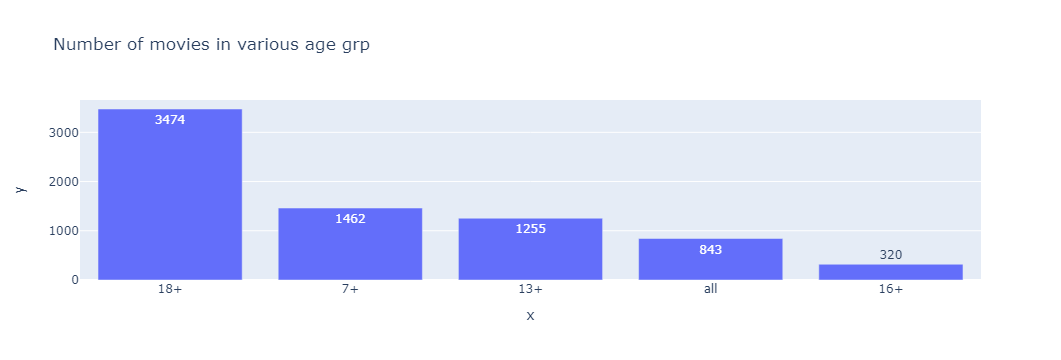

In [ ]:

agefig = px.bar( df,
             x=AGE.index, 
             y=AGE.values, 
             title='Number of movies in various age grp',
                text=AGE.values,
             height=600)
agefig

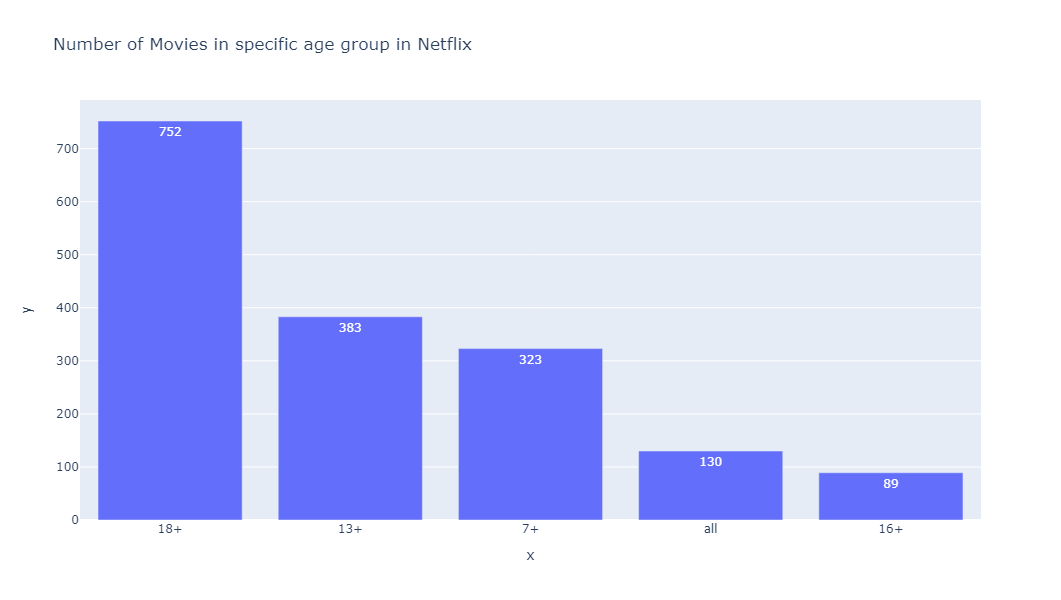

In [4]:
netflix_df=df[df['Netflix']==1]
fig = px.bar(netflix_df, 
             x=netflix_df['Age'].value_counts().index, 
             y=netflix_df['Age'].value_counts(),
             title="Number of Movies in specific age group in Netflix",
             text=netflix_df['Age'].value_counts(), 
             height=600)
fig

## number of movies in specific age grp in amazon prime

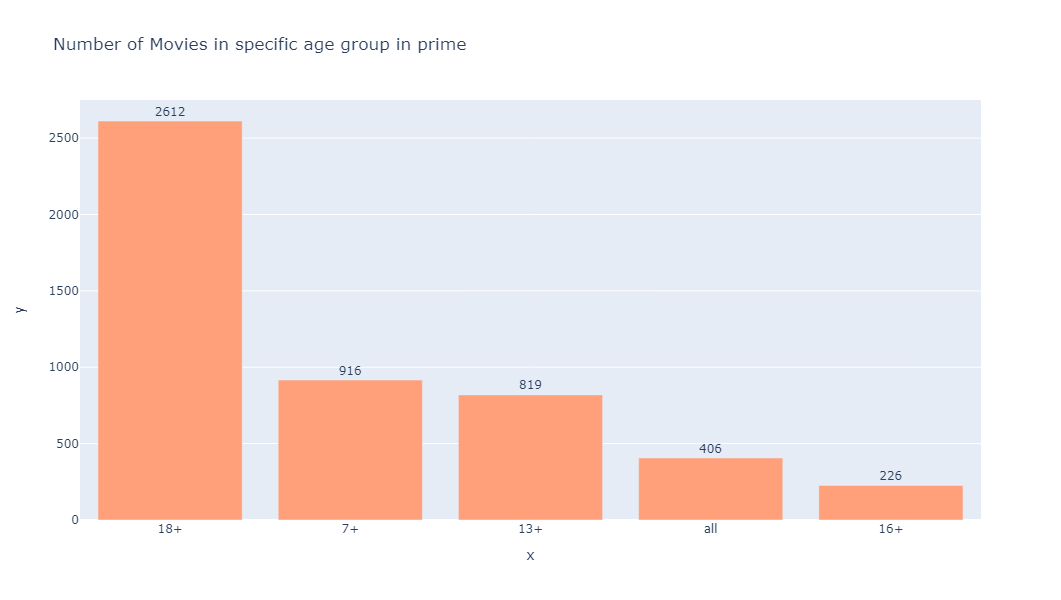

In [5]:
prime_df=df[df['Prime Video']==1]
primefig = px.bar(prime_df, 
             x=prime_df['Age'].value_counts().index, 
             y=prime_df['Age'].value_counts(),
             title="Number of Movies in specific age group in prime",
             text=prime_df['Age'].value_counts(), 
             height=600)
primefig.update_traces(marker_color='lightsalmon', textposition='outside')

## number of movies in specific age group disney+

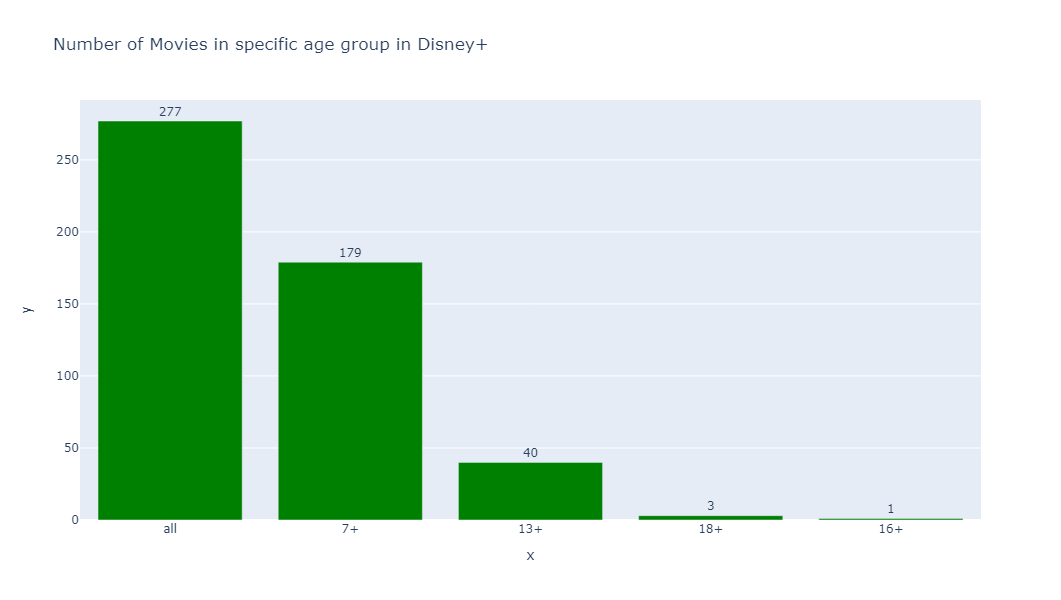

In [6]:
disney_df=df[df['Disney+']==1]
disneyfig = px.bar(disney_df, 
             x=disney_df['Age'].value_counts().index, 
             y=disney_df['Age'].value_counts(),
             title="Number of Movies in specific age group in Disney+",
             text=disney_df['Age'].value_counts(), 
             height=600)
disneyfig.update_traces(marker_color='green', textposition='outside')

## number of movies in specific age group in hulu

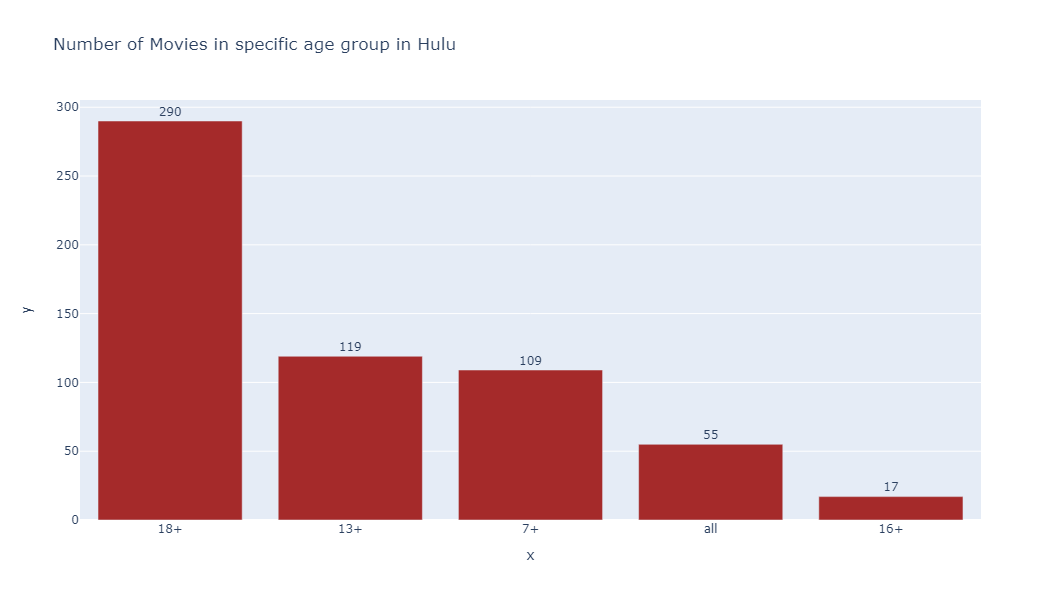

In [7]:
hulu_df=df[df['Hulu']==1]
hulufig = px.bar(hulu_df, 
             x=hulu_df['Age'].value_counts().index, 
             y=hulu_df['Age'].value_counts(),
             title="Number of Movies in specific age group in Hulu",
             text=hulu_df['Age'].value_counts(), 
             height=600)
hulufig.update_traces(marker_color='brown', textposition='outside')

## rotten tomatoes score

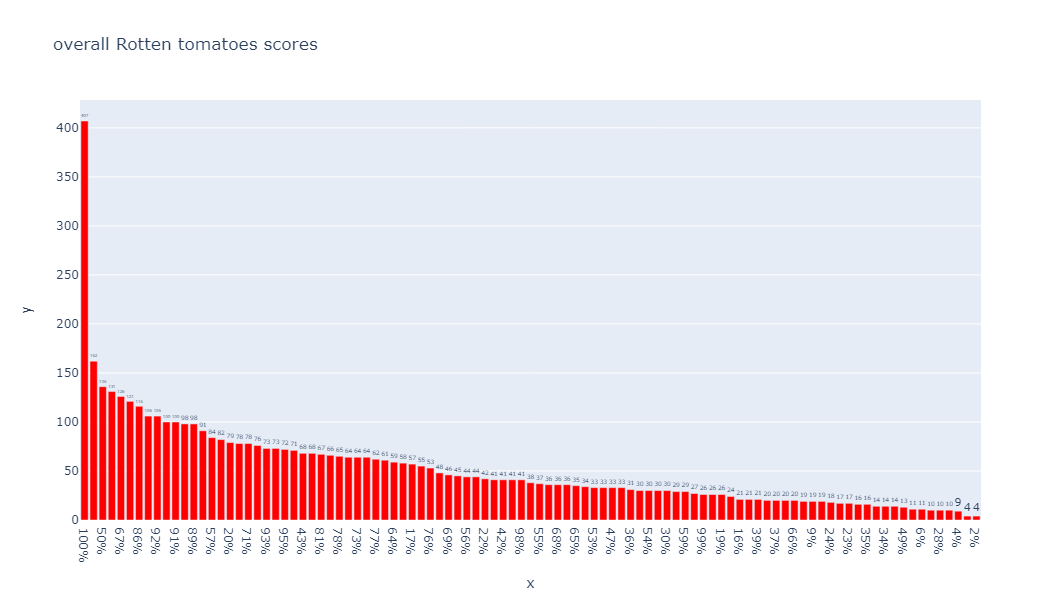

In [8]:
rottenfig = px.bar(df, 
             x=df['Rotten Tomatoes'].value_counts().index, 
             y=df['Rotten Tomatoes'].value_counts(),
             title="overall Rotten tomatoes scores",
             text=df['Rotten Tomatoes'].value_counts(), 
             height=600)
rottenfig.update_traces(marker_color='red', textposition='outside')

## rotten tomatoes score 100 movies

In [22]:
rotten_scores = pd.DataFrame({'Streaming Service': ["Prime Video", "Hulu","Disney+","NetFlix"],
                                    'Rotten Tomato Score' : [netflix_df['Rotten Tomatoes'].value_counts()[0], 
                                                             prime_df['Rotten Tomatoes'].value_counts()[0],
                                                             disney_df['Rotten Tomatoes'].value_counts()[0],
                                                             hulu_df['Rotten Tomatoes'].value_counts()[0]]})
rotten_scores

Streaming Service  Rotten Tomato Score
0       Prime Video                  130
1              Hulu                  257
2           Disney+                   19
3           NetFlix                   18

## streaming service with maximum movies with 100 score

In [23]:
max_stream=rotten_scores.sort_values(ascending=False,by='Rotten Tomato Score')
max_stream

Streaming Service  Rotten Tomato Score
1              Hulu                  257
0       Prime Video                  130
2           Disney+                   19
3           NetFlix                   18

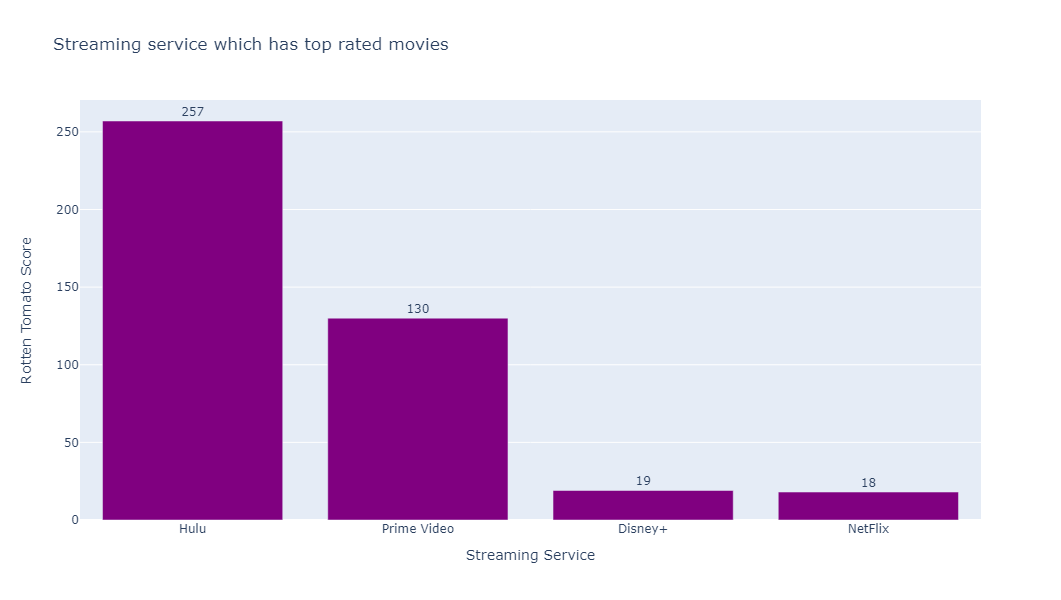

In [30]:
best_service=px.bar(max_stream,
                    x=max_stream['Streaming Service'],
                    y=max_stream['Rotten Tomato Score'],
                    text=max_stream['Rotten Tomato Score'],
                    title='Streaming service which has top rated movies',
                    height=600)
best_service.update_traces(marker_color='purple', textposition='outside')
                    
                    

## IMBD ratings

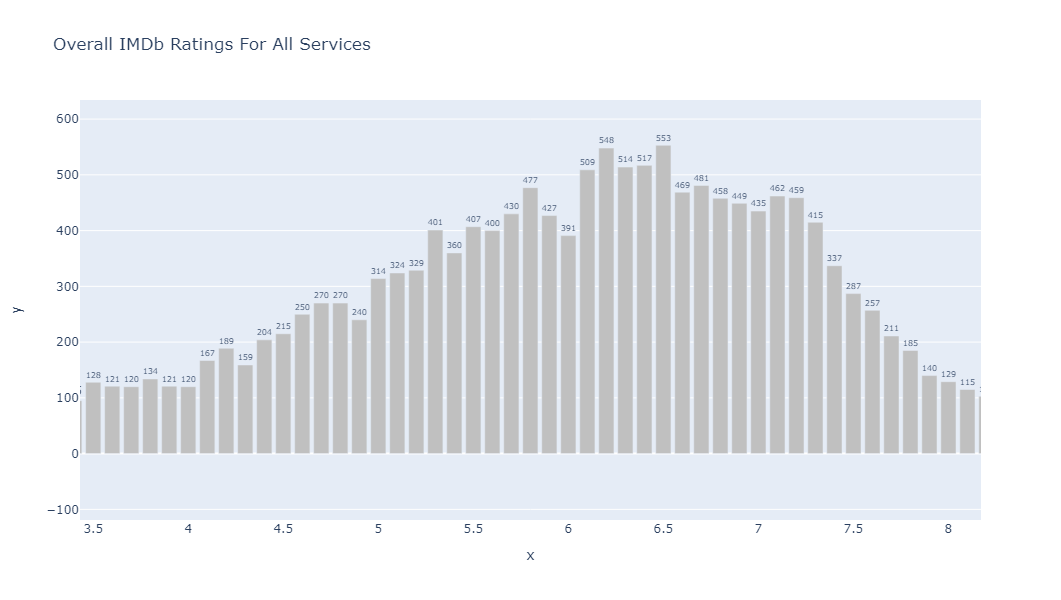

In [31]:
IMBD_overall = px.bar(df, 
             y=df['IMDb'].value_counts(), 
             x=df['IMDb'].value_counts().index,
             title="Overall IMDb Ratings For All Services",
             text=df['IMDb'].value_counts(), 
             height=600)
IMBD_overall.update_traces(marker_color='silver', textposition='outside')

## which country made most number of movies in streaming platforms

In [37]:
df['Country'].value_counts()

United States                                             8776
India                                                     1064
United Kingdom                                             905
Canada                                                     555
Australia                                                  202
                                                          ... 
Bosnia and Herzegovina,Austria,Turkey,France                 1
Belgium,France,United States                                 1
Germany,Israel,Canada,United States                          1
France,Belgium,Luxembourg,Romania,Canada,United States       1
United States,Hungary,United Kingdom                         1
Name: Country, Length: 1303, dtype: int64

## top 5 country

In [45]:
df['Country'].value_counts().head()

United States     8776
India             1064
United Kingdom     905
Canada             555
Australia          202
Name: Country, dtype: int64

## country having most movies in netflix

In [21]:
netflix_df=df[df['Netflix']==1]
 
netflix_df['Country'].value_counts()
         
             

United States                   1305
India                            539
United Kingdom                   119
Canada                            77
Spain                             75
                                ... 
France,United Kingdom              1
United Kingdom,Canada,Japan        1
Thailand,China,United States       1
Hong Kong,China,Singapore          1
Bangladesh,India                   1
Name: Country, Length: 423, dtype: int64

## top 5 countries with most movies in netflix

In [53]:
netflix_df['Country'].value_counts().head()

United States     1305
India              539
United Kingdom     119
Canada              77
Spain               75
Name: Country, dtype: int64

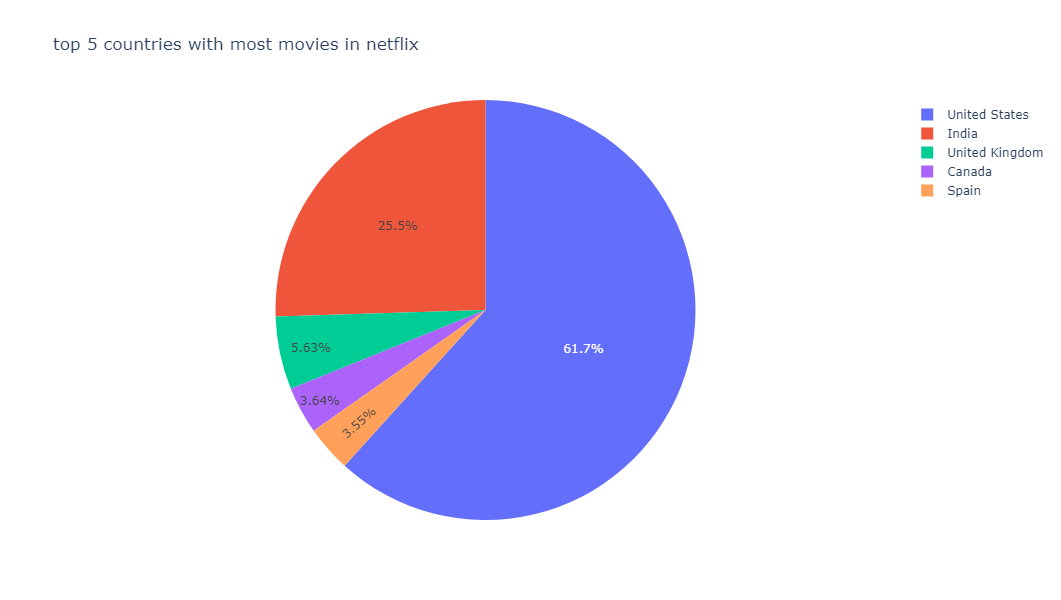

In [55]:
px.pie(netflix_df,
       values=netflix_df['Country'].value_counts().head(),
       names=netflix_df['Country'].value_counts().head().index,
       title='top 5 countries with most movies in netflix',
       height=600)

## countries having most movies in amazon prime

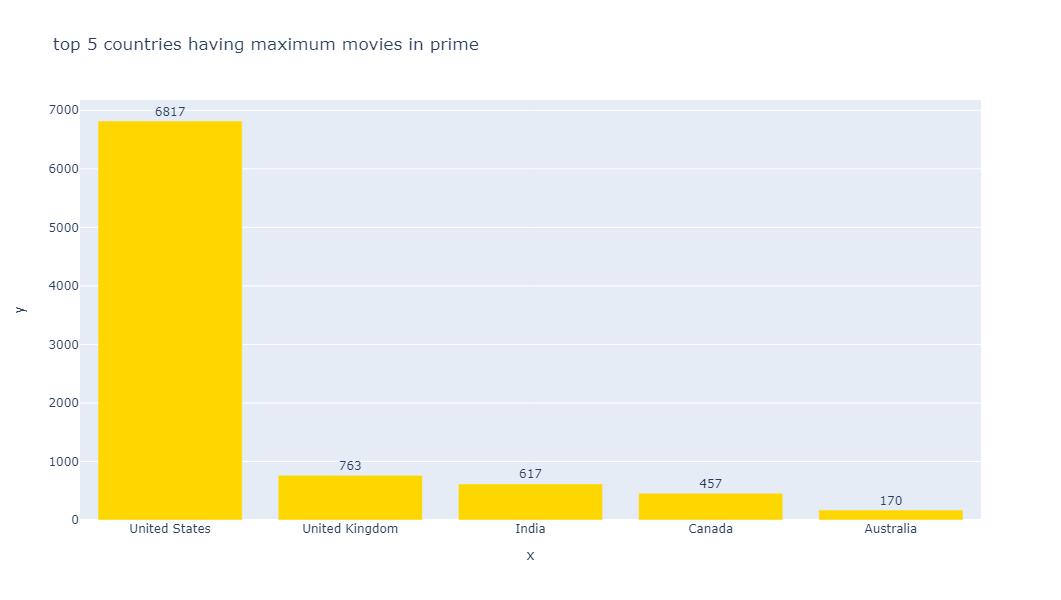

In [22]:
prime_df=df[df['Prime Video']==1]
count_amazon=px.bar(prime_df,
       x=prime_df['Country'].value_counts().head().index,
       y=prime_df['Country'].value_counts().head(),
       text=prime_df['Country'].value_counts().head(),
       title='top 5 countries having maximum movies in prime',
       height=600)
count_amazon.update_traces(marker_color='gold', textposition='outside')
       

## countries having most movies in disney+

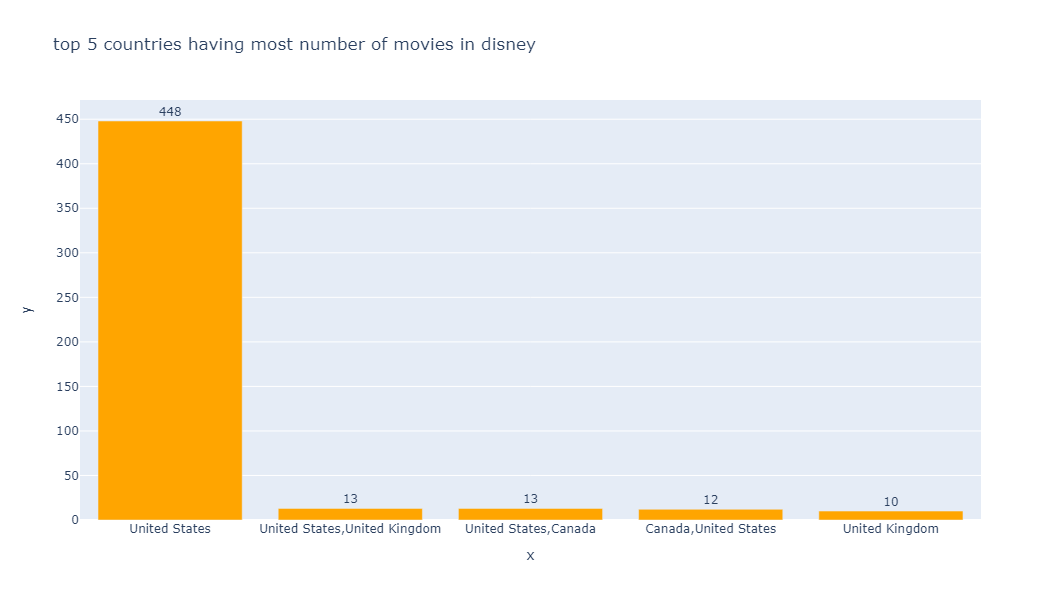

In [23]:
disney_df=df[df['Disney+']==1]
disneycount = px.bar(disney_df, 
             x=disney_df['Country'].value_counts().head().index, 
             y=disney_df['Country'].value_counts().head(),
             title="top 5 countries having most number of movies in disney",
             text=disney_df['Country'].value_counts().head(), 
             height=600)
disneycount.update_traces(marker_color='orange', textposition='outside')

## countries having most movies in hulu

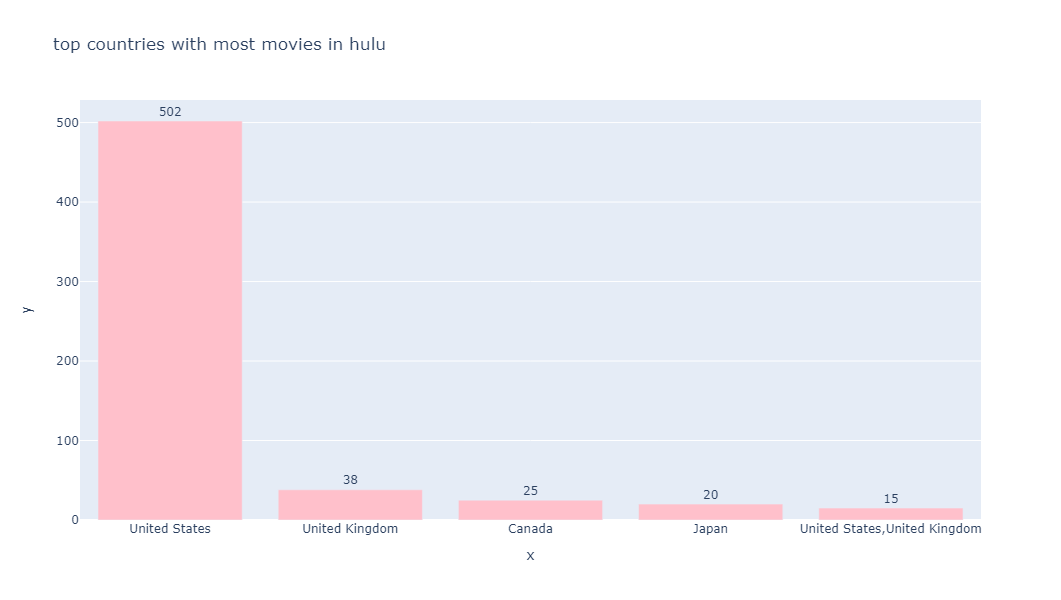

In [24]:
hulu_df=df[df['Hulu']==1]
hulucount = px.bar(hulu_df, 
             x=hulu_df['Country'].value_counts().head().index, 
             y=hulu_df['Country'].value_counts().head(),
             title="top countries with most movies in hulu ",
             text=hulu_df['Country'].value_counts().head(), 
             height=600)
hulucount.update_traces(marker_color='pink', textposition='outside')

## runtimes of movie

In [18]:
RuntimeCount = pd.DataFrame(dict(df['Runtime'].value_counts().sort_values(ascending=False)[:10]).items(), 
             columns=['Runtime', 'Count'])

RuntimeCount          
                            
                            

Runtime  Count
0       90.0    971
1       95.0    489
2       92.0    434
3       93.0    422
4       85.0    408
..       ...    ...
152     19.0      8
153     32.0      8
154      9.0      8
155      7.0      8
156     10.0      8

[157 rows x 2 columns]

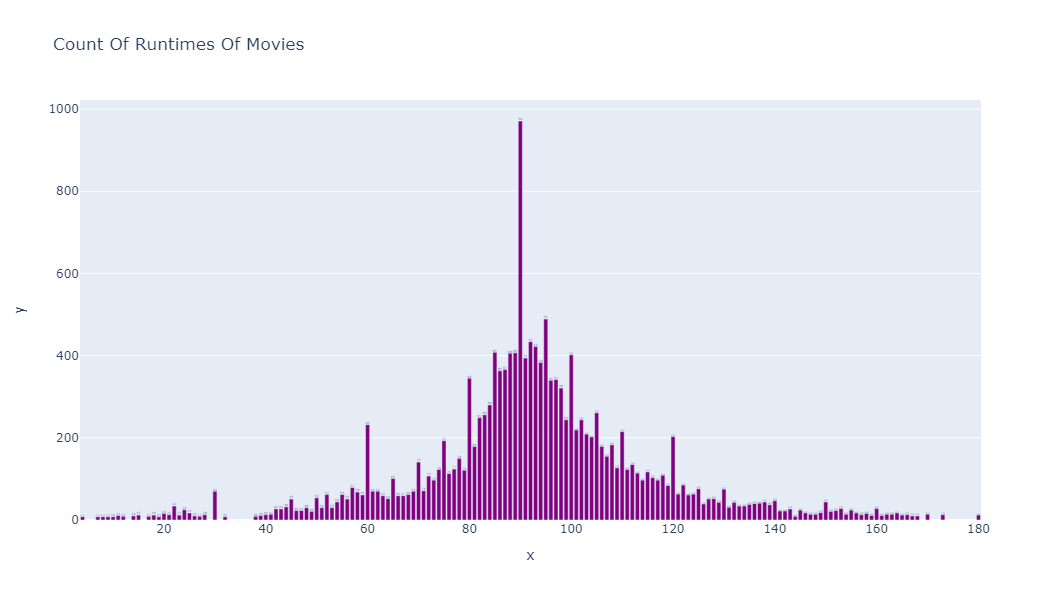

In [19]:
fig = px.bar(df, 
             x=RuntimeCount['Runtime'], 
             y=RuntimeCount['Count'],
             title="Count Of Runtimes Of Movies",
             text=RuntimeCount['Runtime'], 
             height=600)
fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}', textposition='outside')

## top 5 genres

In [32]:

           
genre_count= df['Genres'].value_counts()
genre_count

Drama                                                 1341
Documentary                                           1229
Comedy                                                1040
Comedy,Drama                                           446
Horror                                                 436
                                                      ... 
Fantasy,Sci-Fi,Thriller                                  1
Action,Comedy,Drama,Musical,Romance                      1
Animation,Adventure,Family,Fantasy,Musical,Romance       1
Drama,Horror,War                                         1
Comedy,Family,Adventure,Fantasy,Sci-Fi                   1
Name: Genres, Length: 1909, dtype: int64

In [38]:
genres=pd.DataFrame(genre_count.items(),columns=['Genres','Count']).head()
genres

Genres  Count
0         Drama   1341
1   Documentary   1229
2        Comedy   1040
3  Comedy,Drama    446
4        Horror    436

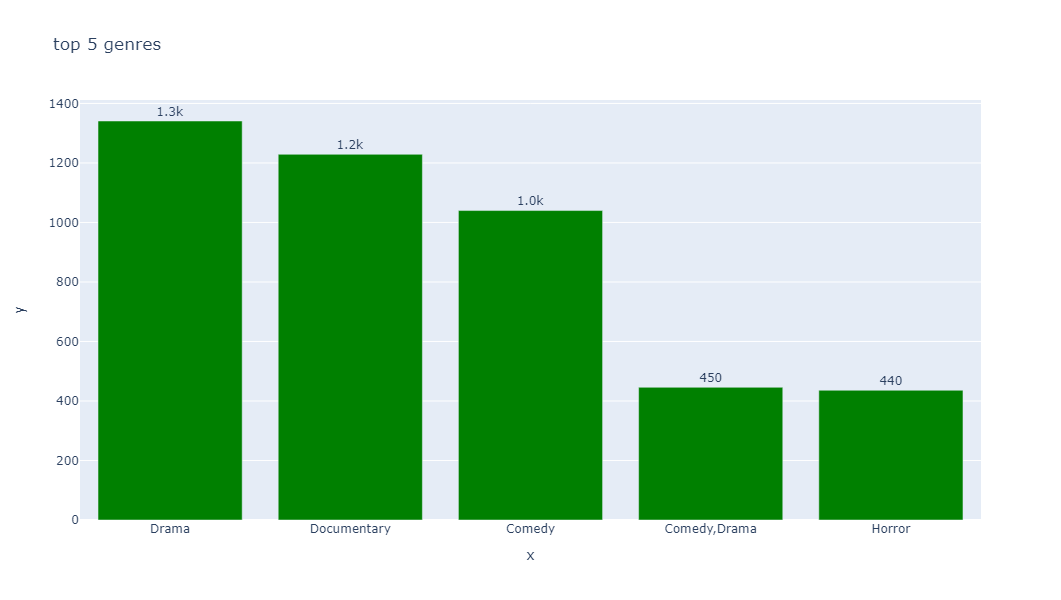

In [39]:
best_genres=px.bar(df,
                   x=genres['Genres'],
                   y=genres['Count'],
                   title='top 5 genres',
                   text=genres['Count'],
                   height=600)
best_genres.update_traces(marker_color='green',texttemplate='%{text:.2s}', textposition='outside')

## Top 5 genres in netflix

In [63]:
netgenre=netflix_df['Genres'].value_counts().head(5)
netgenre

Comedy                  424
Drama                   259
Documentary             241
Comedy,Drama            129
Comedy,Drama,Romance    100
Name: Genres, dtype: int64

In [64]:
net=pd.DataFrame(netgenre.items(),columns=('Genres','Count'))
net
                

Genres  Count
0                Comedy    424
1                 Drama    259
2           Documentary    241
3          Comedy,Drama    129
4  Comedy,Drama,Romance    100

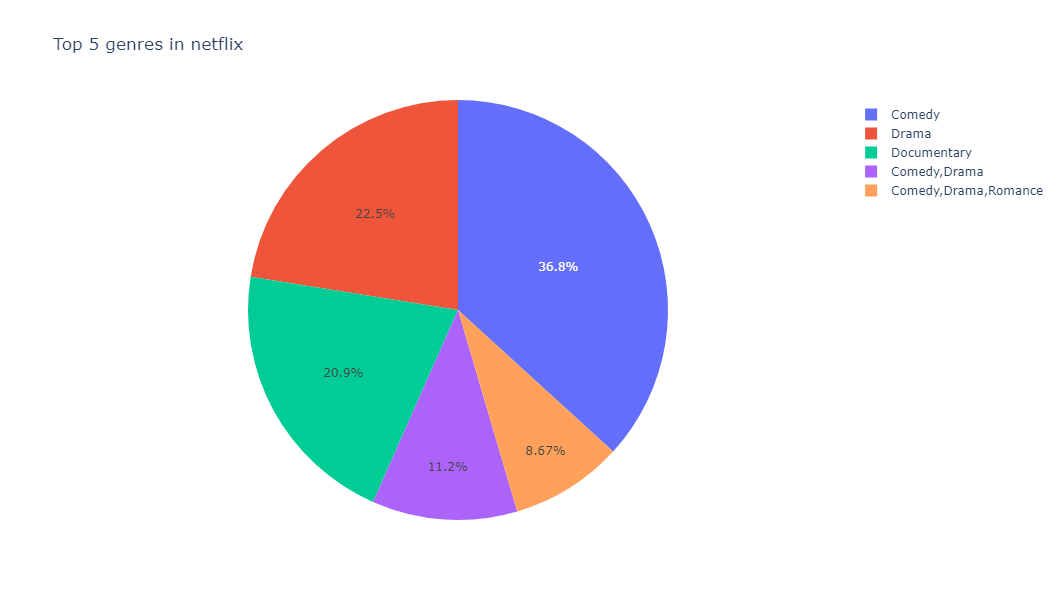

In [65]:
topnetgenre=px.pie(df,
                   names=net['Genres'],
                   values=net['Count'],
                   title='Top 5 genres in netflix',
                   height=600)
topnetgenre

## Top 5 Genres in Amazon Prime

In [69]:
Amazongen=prime_df['Genres'].value_counts().head(5)
Amazongen

Drama           1069
Documentary      900
Comedy           622
Horror           400
Comedy,Drama     302
Name: Genres, dtype: int64

In [70]:
amaz=pd.DataFrame(Amazongen.items(),columns=('Genres','Count'))
amaz

Genres  Count
0         Drama   1069
1   Documentary    900
2        Comedy    622
3        Horror    400
4  Comedy,Drama    302

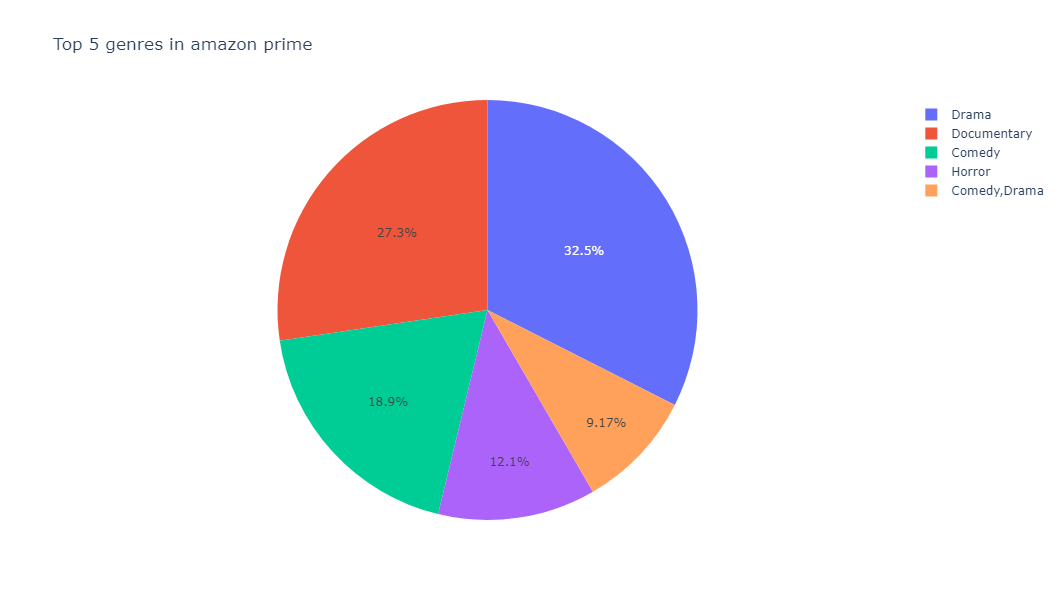

In [72]:
topprimegenre=px.pie(df,
                   names=amaz['Genres'],
                   values=amaz['Count'],
                   title='Top 5 genres in amazon prime',
                   height=600)
topprimegenre

## Top 5 genres in Disney +

In [73]:
disgen=disney_df['Genres'].value_counts().head(5)
disgen

Documentary                                  34
Animation,Adventure,Comedy,Family,Fantasy    16
Comedy,Drama,Family                          13
Action,Adventure,Sci-Fi                      13
Comedy,Family                                13
Name: Genres, dtype: int64

In [74]:
dis=pd.DataFrame(disgen.items(),columns=('Genres','Count'))
dis

Genres  Count
0                                Documentary     34
1  Animation,Adventure,Comedy,Family,Fantasy     16
2                        Comedy,Drama,Family     13
3                    Action,Adventure,Sci-Fi     13
4                              Comedy,Family     13

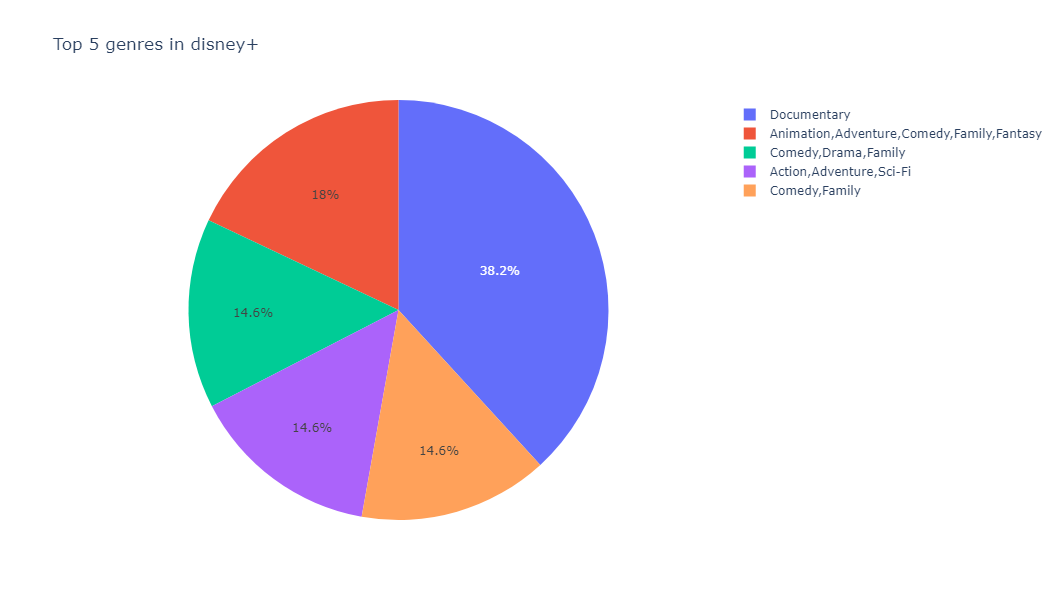

In [75]:
topdisgenre=px.pie(df,
                   names=dis['Genres'],
                   values=dis['Count'],
                   title='Top 5 genres in disney+',
                   height=600)
topdisgenre

## top 5 genres in hulu

In [76]:
hulugen=hulu_df['Genres'].value_counts().head(5)
hulugen

Documentary             75
Drama                   44
Comedy,Drama            38
Comedy                  36
Comedy,Drama,Romance    30
Name: Genres, dtype: int64

In [77]:
hul=pd.DataFrame(hulugen.items(),columns=('Genres','Count'))
hul

Genres  Count
0           Documentary     75
1                 Drama     44
2          Comedy,Drama     38
3                Comedy     36
4  Comedy,Drama,Romance     30

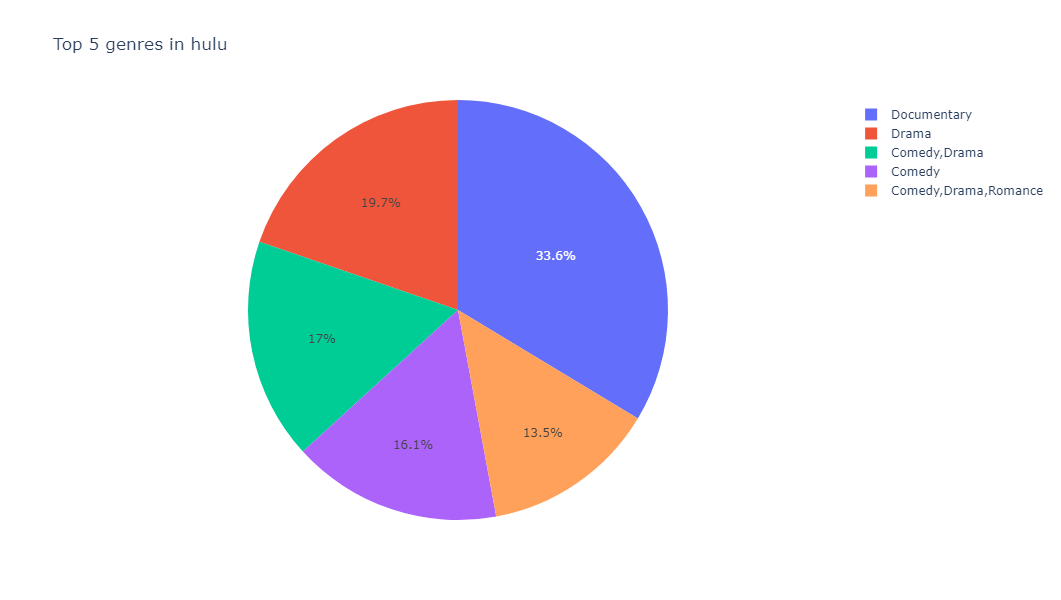

In [78]:
tophulgenre=px.pie(df,
                   names=hul['Genres'],
                   values=hul['Count'],
                   title='Top 5 genres in hulu',
                   height=600)
tophulgenre

## top 10 directors who have most movies

In [45]:
director=df['Directors'].value_counts().head(10)
director

Jay Chapman              36
Joseph Kane              30
Cheh Chang               26
Sam Newfield             22
Jim Wynorski             22
David DeCoteau           21
William Beaudine         21
Jay Karas                20
Raúl Campos,Jan Suter    20
Marcus Raboy             18
Name: Directors, dtype: int64

In [46]:
max_movies=pd.DataFrame(director.items(),columns=['Director','Count'])
max_movies

Director  Count
0            Jay Chapman     36
1            Joseph Kane     30
2             Cheh Chang     26
3           Sam Newfield     22
4           Jim Wynorski     22
5         David DeCoteau     21
6       William Beaudine     21
7              Jay Karas     20
8  Raúl Campos,Jan Suter     20
9           Marcus Raboy     18

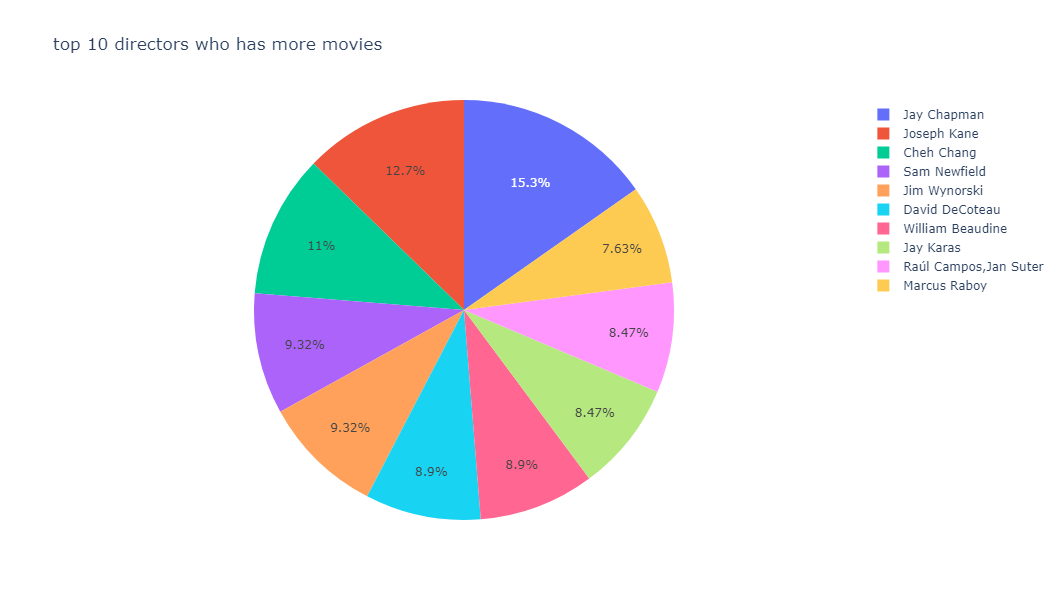

In [48]:
most_directed=px.pie(df,
                     names=max_movies['Director'],
                     values=max_movies['Count'],
                     title='top 10 directors who has more movies',
                     height=600)
most_directed
                

# directors having most number of movies in netflix

In [54]:
netflix_df=df[df['Netflix']==1]
director_net=netflix_df['Directors'].value_counts().head(10)
director_net

Raúl Campos,Jan Suter    20
Marcus Raboy             16
Jay Karas                14
Jay Chapman              12
Shannon Hartman           9
Lance Bangs               8
Don Michael Paul          7
Hakan Algül               7
Yilmaz Erdogan            7
Steven Spielberg          7
Name: Directors, dtype: int64

In [72]:
net_direc=pd.DataFrame(director_net.items(),columns=['Directors','Count'])
net_direc
             

Directors  Count
0  Raúl Campos,Jan Suter     20
1           Marcus Raboy     16
2              Jay Karas     14
3            Jay Chapman     12
4        Shannon Hartman      9
5            Lance Bangs      8
6       Don Michael Paul      7
7            Hakan Algül      7
8         Yilmaz Erdogan      7
9       Steven Spielberg      7

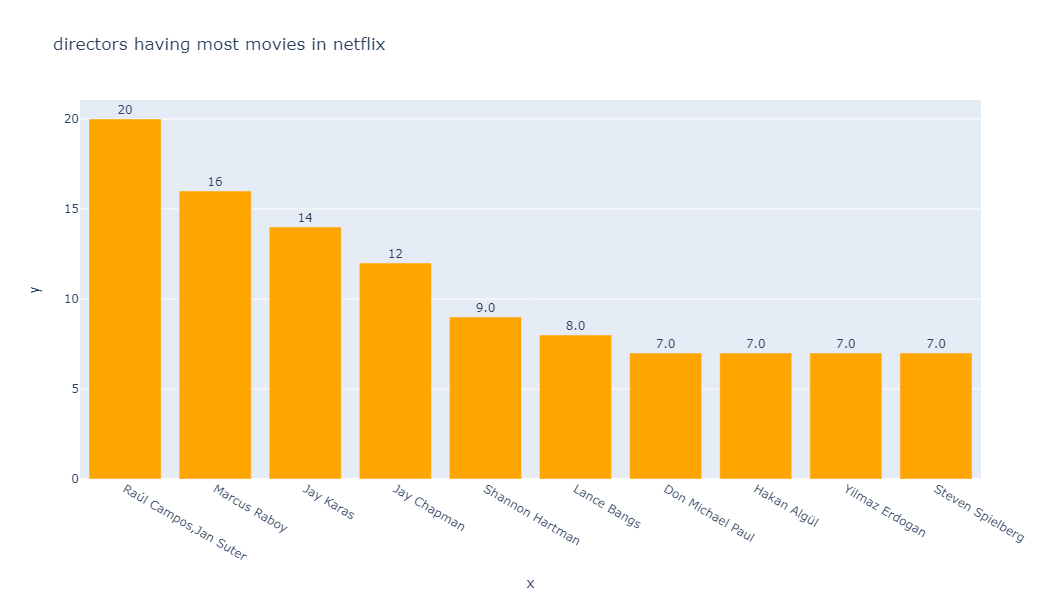

In [78]:
top10_netflix=px.bar(df,
                    x=net_direc['Directors'],
                    y=net_direc['Count'],
                    title='directors having most movies in netflix',
                    text=net_direc['Count'],
                    height=600)

              
top10_netflix.update_traces(marker_color='orange',texttemplate='%{text:.2s}', textposition='outside')
              

## number of movies in netflix above imbd 8.5

In [90]:
data_netflix_top =netflix_df[netflix_df['IMDb']>8.5]
data_netflix_top = data_netflix_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
data_netflix_top


Title  IMDb
1292  My Next Guest with David Letterman and Shah Ru...   9.3
947                                           Natsamrat   9.1
0                                             Inception   8.8
4                        The Good, the Bad and the Ugly   8.8
1                                            The Matrix   8.7
1214                             Bill Hicks: Relentless   8.7
1311                             Eh Janam Tumhare Lekhe   8.7
1458                                    Untamed Romania   8.7
1979            One Heart: The A.R. Rahman Concert Film   8.7
845                                            Gol Maal   8.6
1312                            Bill Hicks: Revelations   8.6
1356                              Merku Thodarchi Malai   8.6
1468                                              K. D.   8.6
1538                      Luciano Mellera: Infantiloide   8.6
2195        Hikaru Utada Laughter in the Dark Tour 2018   8.6
2704                             True: Happy Hearts Day   8.6

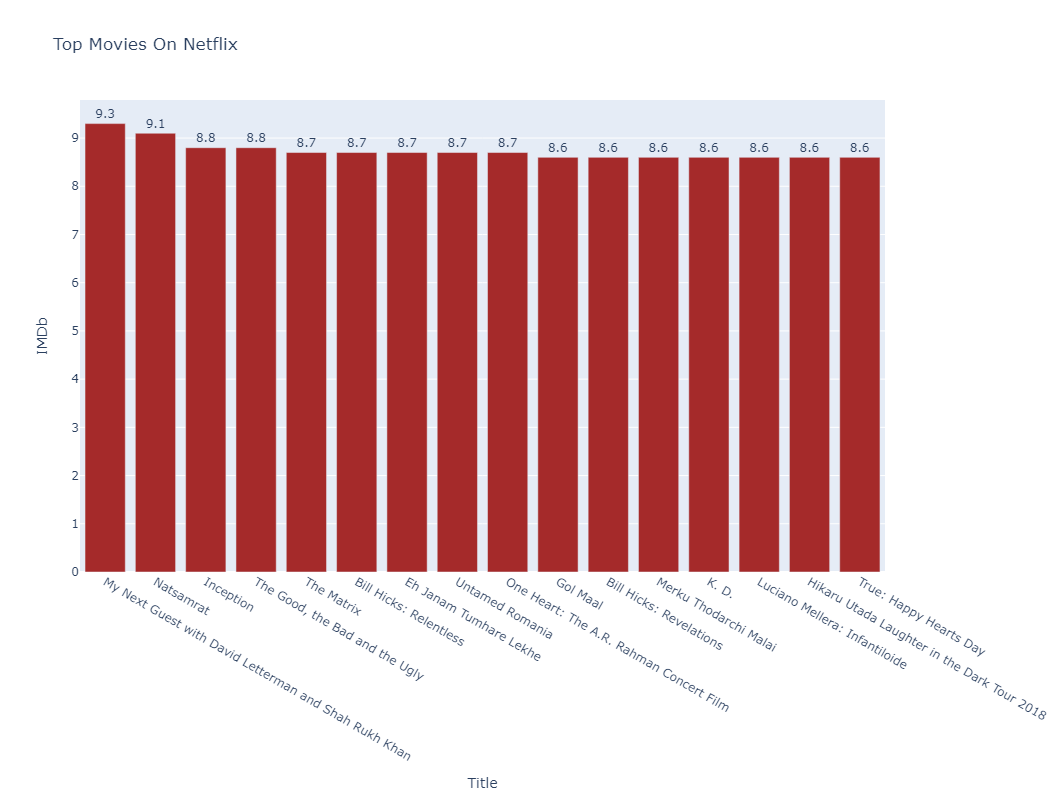

In [88]:
fig = px.bar(data_netflix_top, 
             x=data_netflix_top['Title'], 
             y=data_netflix_top['IMDb'],
             title="Top Movies On Netflix",
             text=data_netflix_top['IMDb'],
             height=800)
fig.update_traces(marker_color='brown',texttemplate='%{text:.2s}', textposition='outside')

# directors having most number of movies in amazon prime

In [95]:
prime_df=df[df['Prime Video']==1]
prime_dir=prime_df['Directors'].value_counts().head(10)
prime_dir

Joseph Kane         30
Jay Chapman         29
Cheh Chang          25
Sam Newfield        22
Jim Wynorski        22
William Beaudine    21
David DeCoteau      21
William Witney      17
Mark Atkins         16
Lesley Selander     16
Name: Directors, dtype: int64

In [96]:
prime=pd.DataFrame(prime_dir.items(),columns=['Directors','Count'])
prime

Directors  Count
0       Joseph Kane     30
1       Jay Chapman     29
2        Cheh Chang     25
3      Sam Newfield     22
4      Jim Wynorski     22
5  William Beaudine     21
6    David DeCoteau     21
7    William Witney     17
8       Mark Atkins     16
9   Lesley Selander     16

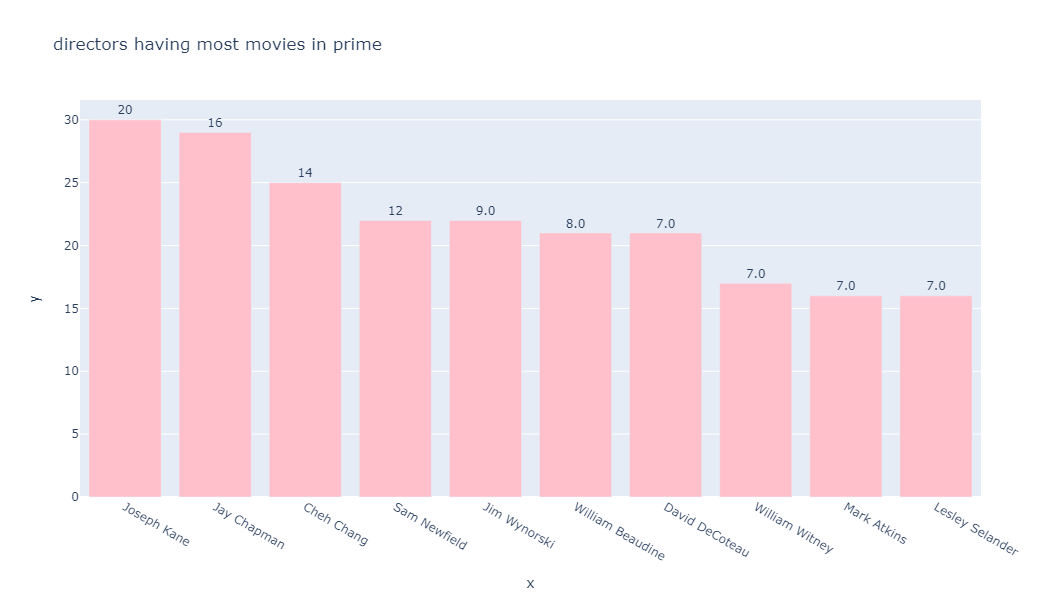

In [97]:
primetop=px.bar(df,
                    x=prime['Directors'],
                    y=prime['Count'],
                    title='directors having most movies in prime',
                    text=net_direc['Count'],
                    height=600)

              
primetop.update_traces(marker_color='pink',texttemplate='%{text:.2s}', textposition='outside')
              

## number of movies in prime above imbd 8.5

In [82]:
data_prime_top =prime_df[prime_df['IMDb']>8.5]

data_prime_top= data_prime_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
data_prime_top

Title  IMDb
5110                                    Love on a Leash   9.3
7426                                             Bounty   9.3
6837            Steven Banks: Home Entertainment Center   9.3
6566                                         Square One   9.3
7220                                 Down, But Not Out!   9.3
...                                                 ...   ...
5730                George Carlin: You Are All Diseased   8.6
5607                                              Aruvi   8.6
9004  The Legend of Pancho Barnes and the Happy Bott...   8.6
9098                                        Yellow Colt   8.6
7619                                     The New Public   8.6

[80 rows x 2 columns]

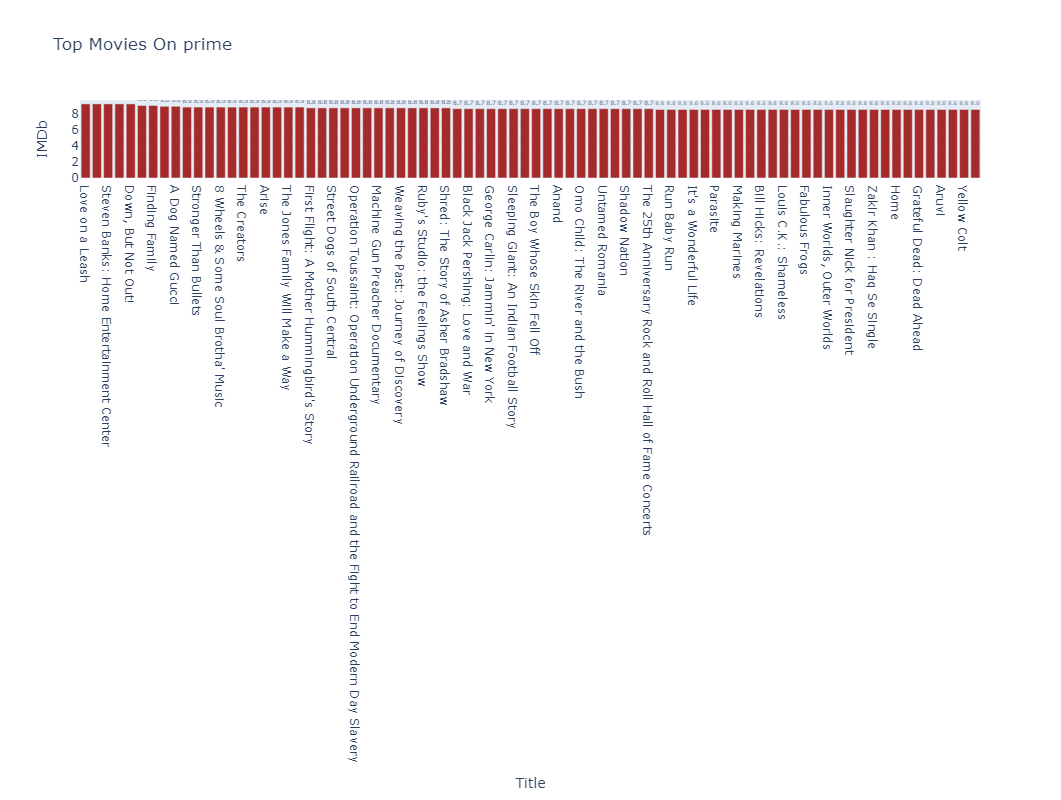

In [102]:
fig = px.bar(data_prime_top, 
             x=data_prime_top['Title'], 
             y=data_prime_top['IMDb'],
             title="Top Movies On prime",
             text=data_prime_top['IMDb'],
             height=800)
fig.update_traces(marker_color='brown',texttemplate='%{text:.2s}', textposition='outside')

## most number of director's movies in disney

In [108]:
disney_df=df[df['Disney+']==1]
disney_dir=disney_df['Directors'].value_counts().head(10)
disney_dir

Paul Hoen           15
Robert Stevenson    11
Vincent McEveety     9
Kenny Ortega         9
James Algar          8
Stuart Gillard       8
Norman Tokar         7
Duwayne Dunham       7
Greg Beeman          5
Steve Boyum          5
Name: Directors, dtype: int64

In [109]:
disney=pd.DataFrame(disney_dir.items(),columns=['Directors','Count'])
disney

Directors  Count
0         Paul Hoen     15
1  Robert Stevenson     11
2  Vincent McEveety      9
3      Kenny Ortega      9
4       James Algar      8
5    Stuart Gillard      8
6      Norman Tokar      7
7    Duwayne Dunham      7
8       Greg Beeman      5
9       Steve Boyum      5

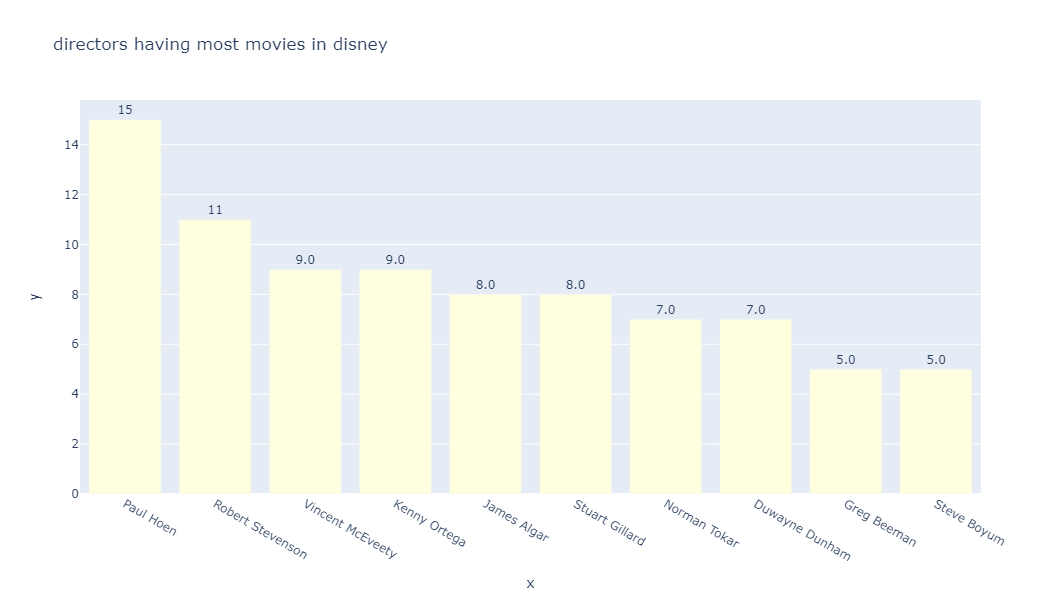

In [110]:
disneytop=px.bar(df,
                    x=disney['Directors'],
                    y=disney['Count'],
                    title='directors having most movies in disney',
                    text=disney['Count'],
                    height=600)

              
disneytop.update_traces(marker_color='lightyellow',texttemplate='%{text:.2s}', textposition='outside')

## movies in disney + above 8.5 imbd

In [104]:
disney_top = disney_df[disney_df['IMDb']>8.5]
disney_top = disney_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
disney_top

Title  IMDb
16213  Star Wars: The Empire Strikes Back   8.7
16212               Star Wars: A New Hope   8.6

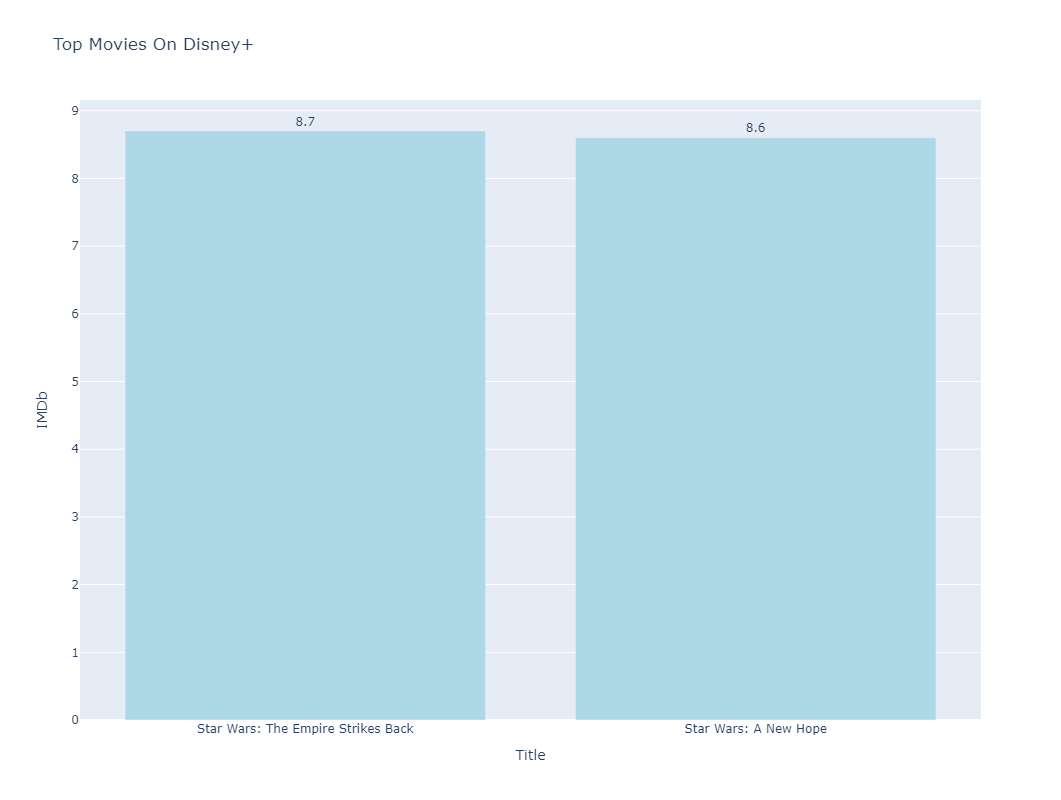

In [105]:
fig = px.bar(disney_top, 
             x=disney_top['Title'], 
             y=disney_top['IMDb'],
             title="Top Movies On Disney+",
             text=disney_top['IMDb'],
             height=800)
fig.update_traces(marker_color='lightblue',texttemplate='%{text:.2s}', textposition='outside')

## directors having most movies in hulu

In [111]:
hulu_df=df[df['Hulu']==1]
hulu_dir=hulu_df['Directors'].value_counts().head(10)
hulu_dir

Tyler Perry             5
Savage Steve Holland    5
Richard Rich            4
Ron Myrick              3
William Lau             3
Kunihiko Yuyama         3
Bong Joon Ho            3
Alan Metter             3
Michael Apted           3
Jason Murphy            2
Name: Directors, dtype: int64

In [112]:
hulu=pd.DataFrame(hulu_dir.items(),columns=['Directors','Count'])
hulu

Directors  Count
0           Tyler Perry      5
1  Savage Steve Holland      5
2          Richard Rich      4
3            Ron Myrick      3
4           William Lau      3
5       Kunihiko Yuyama      3
6          Bong Joon Ho      3
7           Alan Metter      3
8         Michael Apted      3
9          Jason Murphy      2

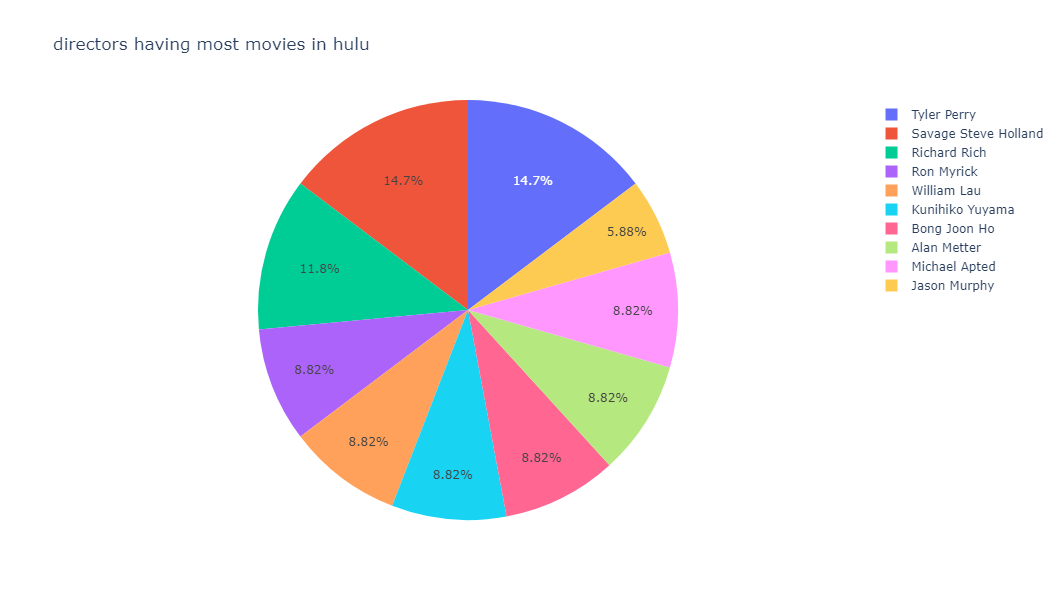

In [116]:
hulutop=px.pie(df,
                names=hulu['Directors'],
                values=hulu['Count'],
                title='directors having most movies in hulu',
                
                height=600)
hulutop
                   

## movies in hulu above imbd 8.5

In [106]:
hulu_top = hulu_df[hulu_df['IMDb']>8.5]
hulu_top = hulu_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
hulu_top

Title  IMDb
3560  The Dark Knight   9.0
3561       GoodFellas   8.7
3562         Parasite   8.6
3564   The Green Mile   8.6

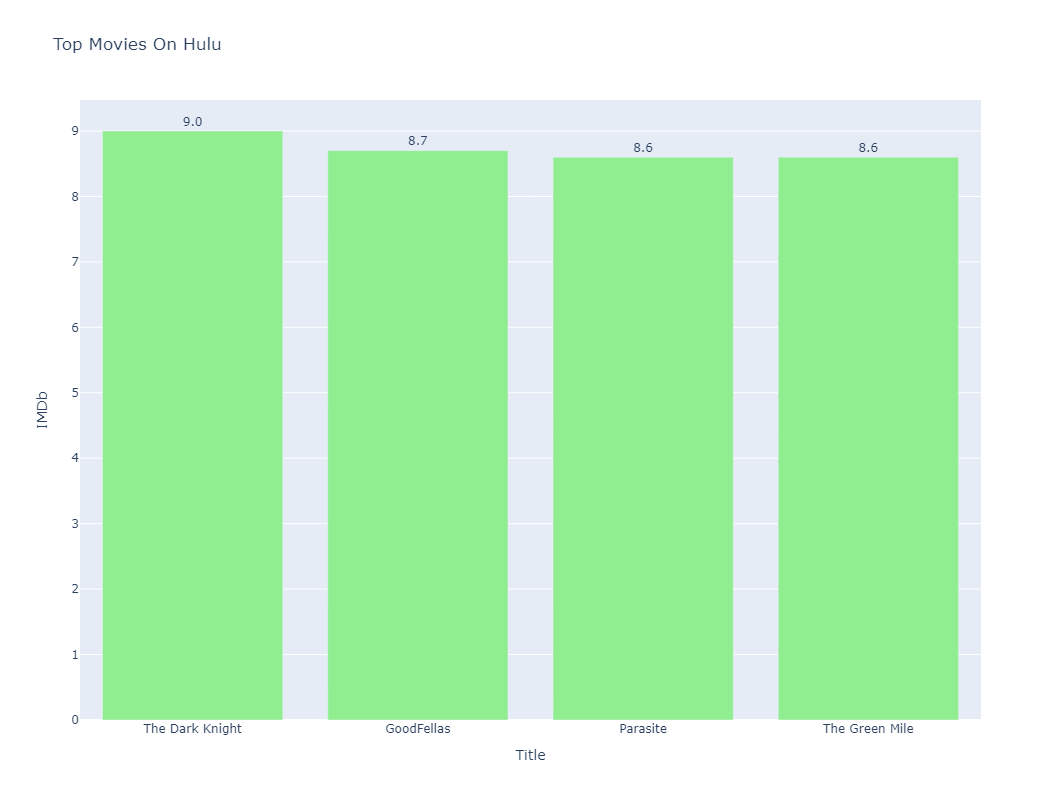

In [107]:
fig = px.bar(hulu_top, 
             x=hulu_top['Title'], 
             y=hulu_top['IMDb'],
             title="Top Movies On Hulu",
             text=hulu_top['IMDb'],
             height=800)
fig.update_traces(marker_color='lightgreen',texttemplate='%{text:.2s}', textposition='outside')

## number of movies in various years in all streaming services

In [5]:
year_all=df['Year'].value_counts()
year_all

2017    1401
2018    1285
2016    1206
2015    1065
2014     986
        ... 
1924       1
1902       1
1912       1
1917       1
1916       1
Name: Year, Length: 109, dtype: int64

In [7]:
year=pd.DataFrame(year_all.items(),columns=('Year','Count'))
year

Year  Count
0    2017   1401
1    2018   1285
2    2016   1206
3    2015   1065
4    2014    986
..    ...    ...
104  1924      1
105  1902      1
106  1912      1
107  1917      1
108  1916      1

[109 rows x 2 columns]

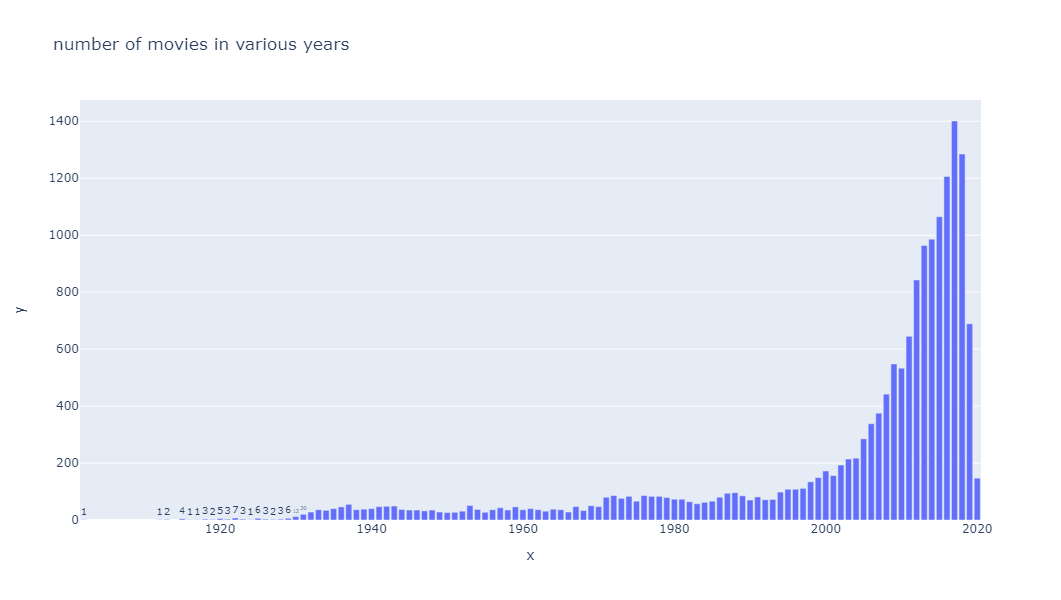

In [11]:
total_movies=px.bar(df,
                    x=year['Year'],
                    y=year['Count'],
                    title='number of movies in various years',
                    text=year['Count'],
                    height=600)
                    

total_movies
                    
                

## Number of movies in various years in netflix

In [27]:
netflix_year=netflix_df['Year'].value_counts()
netflix_year


2017    569
2018    560
2016    444
2019    428
2015    272
       ... 
1962      1
1974      1
1960      1
1959      1
1964      1
Name: Year, Length: 62, dtype: int64

In [28]:
netyr=pd.DataFrame(netflix_year.items(),columns=('Year','Count'))
netyr

Year  Count
0   2017    569
1   2018    560
2   2016    444
3   2019    428
4   2015    272
..   ...    ...
57  1962      1
58  1974      1
59  1960      1
60  1959      1
61  1964      1

[62 rows x 2 columns]

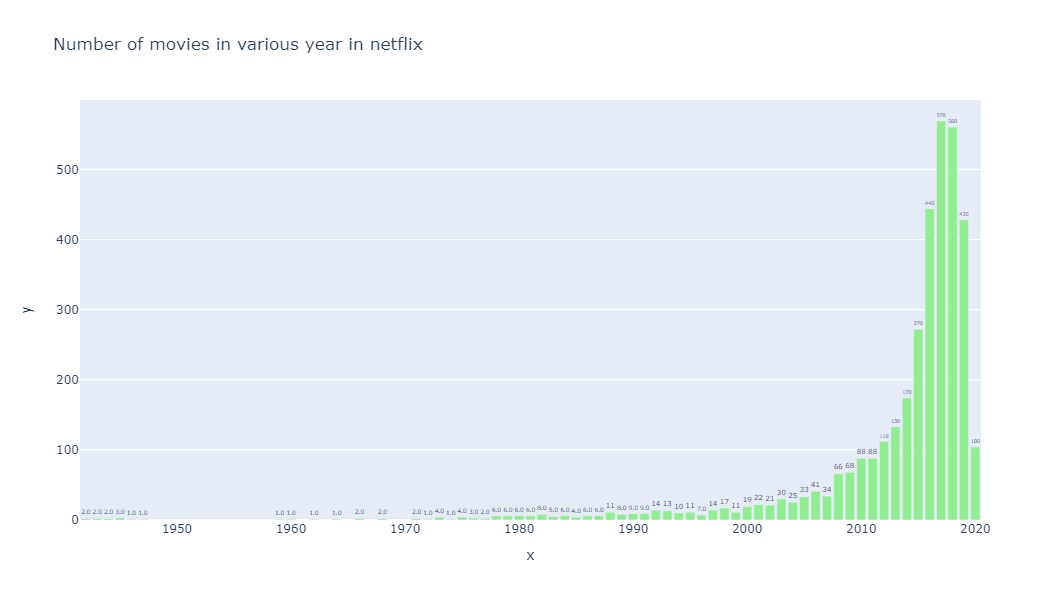

In [40]:
netfig=px.bar(df,
       x=netyr['Year'],
       y=netyr['Count'],
       title='Number of movies in various year in netflix',
       text=netyr['Count'],
       height=600)
netfig.update_traces(marker_color='lightgreen',texttemplate='%{text:.2s}', textposition='outside')

## number of movies in various year in amazon prime

In [43]:
prime_yr=prime_df['Year'].value_counts()
prime_yr

2013    811
2014    783
2015    765
2017    763
2016    730
       ... 
1924      1
1912      1
1917      1
1916      1
1902      1
Name: Year, Length: 109, dtype: int64

In [44]:
primeyr=pd.DataFrame(prime_yr.items(),columns=('Year','Count'))
primeyr

Year  Count
0    2013    811
1    2014    783
2    2015    765
3    2017    763
4    2016    730
..    ...    ...
104  1924      1
105  1912      1
106  1917      1
107  1916      1
108  1902      1

[109 rows x 2 columns]

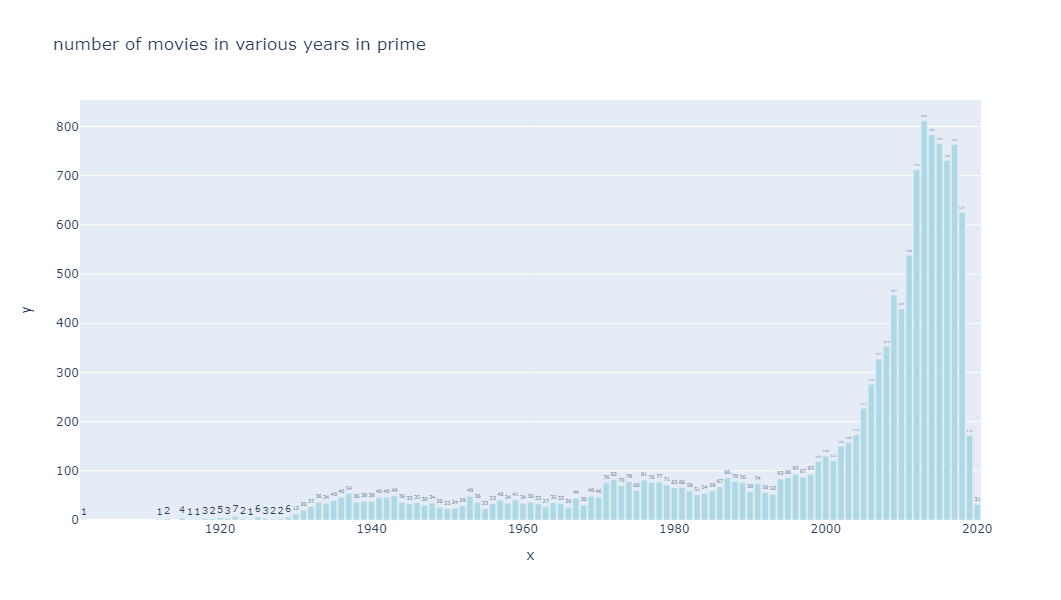

In [48]:
primefig=px.bar(df,
       x=primeyr['Year'],
       y=primeyr['Count'],
       title='number of movies in various years in prime',
       text=primeyr['Count'],
       height=600)
primefig.update_traces(marker_color='lightblue', textposition='outside')




## number of movies in various year in Disney+

In [83]:
disney_yr=disney_df['Year'].value_counts()
disney_yr

2003    25
2019    23
2017    22
2000    21
2004    20
        ..
1970     1
1921     1
1922     1
1923     1
1958     1
Name: Year, Length: 83, dtype: int64

In [84]:
disyr=pd.DataFrame(disney_yr.items(),columns=('Year','Count'))
disyr

Year  Count
0   2003     25
1   2019     23
2   2017     22
3   2000     21
4   2004     20
..   ...    ...
78  1970      1
79  1921      1
80  1922      1
81  1923      1
82  1958      1

[83 rows x 2 columns]

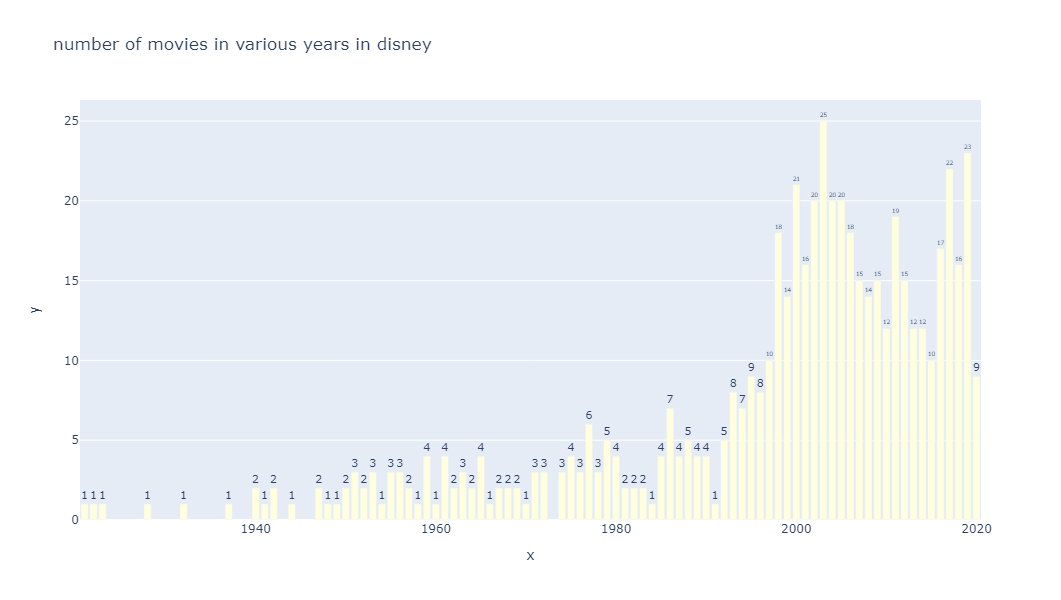

In [85]:
disfig=px.bar(df,
       x=disyr['Year'],
       y=disyr['Count'],
       title='number of movies in various years in disney',
       text=disyr['Count'],
       height=600)
disfig.update_traces(marker_color='lightyellow', textposition='outside')

## number of movies in various year in hulu

In [49]:
hulu_yr=hulu_df['Year'].value_counts()
hulu_yr

2018    158
2017    124
2019    104
2016     62
2015     61
2014     46
2013     45
2012     38
2011     32
2009     26
2010     24
2008     23
2005     13
2006     11
2002      9
1998      8
2004      7
2007      6
2020      6
2003      6
2000      6
1997      6
1999      6
1993      5
1988      5
1989      5
1982      4
1991      4
1984      4
1995      4
2001      4
1973      3
1994      3
1979      2
1955      2
1986      2
1992      2
1985      2
1950      2
1972      2
1957      2
1963      2
1983      2
1990      2
1996      2
1923      1
1949      1
1954      1
1977      1
1971      1
1976      1
1967      1
1951      1
1953      1
1964      1
1974      1
Name: Year, dtype: int64

In [50]:
huluyr=pd.DataFrame(hulu_yr.items(),columns=('Year','Count'))
huluyr

Year  Count
0   2018    158
1   2017    124
2   2019    104
3   2016     62
4   2015     61
5   2014     46
6   2013     45
7   2012     38
8   2011     32
9   2009     26
10  2010     24
11  2008     23
12  2005     13
13  2006     11
14  2002      9
15  1998      8
16  2004      7
17  2007      6
18  2020      6
19  2003      6
20  2000      6
21  1997      6
22  1999      6
23  1993      5
24  1988      5
25  1989      5
26  1982      4
27  1991      4
28  1984      4
29  1995      4
30  2001      4
31  1973      3
32  1994      3
33  1979      2
34  1955      2
35  1986      2
36  1992      2
37  1985      2
38  1950      2
39  1972      2
40  1957      2
41  1963      2
42  1983      2
43  1990      2
44  1996      2
45  1923      1
46  1949      1
47  1954      1
48  1977      1
49  1971      1
50  1976      1
51  1967      1
52  1951      1
53  1953      1
54  1964      1
55  1974      1

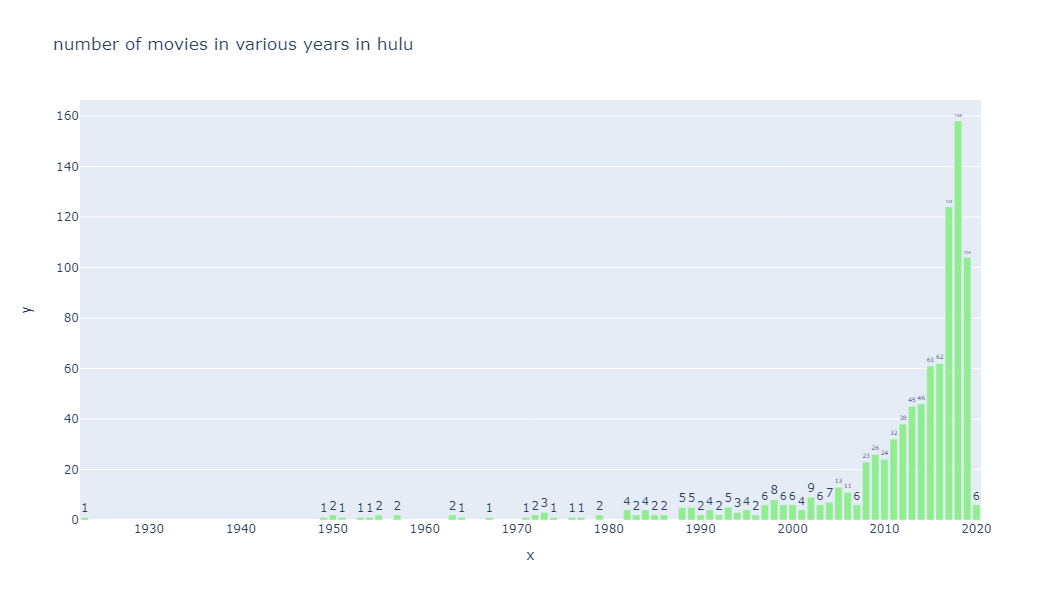

In [51]:
hulufig=px.bar(df,
       x=huluyr['Year'],
       y=huluyr['Count'],
       title='number of movies in various years in hulu',
       text=huluyr['Count'],
       height=600)
hulufig.update_traces(marker_color='lightgreen', textposition='outside')


# RESULTS

## I)Best streaming service based on age:

### 1)Best streaming platform for children= Amazon Prime(916 movies)

### 2)Best streaming platform for 13+= Amazon Prime(819 movies)
### 3)Best streaming platform for 16+= Amazon Prime(226 movies)
### 4)Best streaming platform for 18+= Amazon Prime(2612 movies)
### 5)Best streaming platform for all ages= Amazon Prime(406 movies)

## II)streaming service with maximum movies with 100 score:

### Hulu=257 movies

## III)Top language people prefer in Streaming Services:

### English=10955

## (IV)which country made most number of movies in streaming platforms:

### United states=8776

## V)Top  genre in all platforms:

### (1)Top genre in netflix= comedy (424 movies)
### (2)top genre in amazon prime=(Drame 1069 movies)
### (3)Top genre in Disney+= Documentary (34 movies)
### (4)Top genre in Hulu= Documentary (74 movies)

### (5)Top genre in all services combined=Drama(1341 movies)

## (VI)Most number of movies by a director in all streaming service:

### (1)Most number of movies by a director in Netflix= Raul campos (20 movies)
### (2)Most number of movies by a director in Amazon Prime= Joseph Kane (30 movies)
### (3)Most number of movies by a director in Disney+= Paul Hoen (15 movies)
### (4)Most number of movies by a director in Hulu= Tyler Perry(5 movies)
### Most number of movies by a director in all services= Jay chapman (36 movies)

## (VII)Number of movies in each platform above imbd 8.5:

### (1)Number of movies above imbd 8.5 in Netflix=16 movies
### (2)Number of movies above imbd 8.5 in Prime=80 movies
### (3)Number of movies above imbd 8.5 in Disney+=2 movies
### (4)Number of movies above imbd 8.5 in Hulu=4 movies

## (VIII)Streaming service having most number of movies released in a year:

### (1)Netflix having most number of movies released in a year:2017 (569 movies)
### (2)Amazon prime having most number of movies released in a year:2013 (811 movies)
### (3)Disney+ having most number of movies released in a year:2003 (25 movies)
### (4)Hulu having most number of movies released in a year:2018 (158 movies)